# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria


  
  Thursday, 27th April, 15:30–17:00 / Room -2.91  
  
  
**Convenors**
* [Dr Edward Byers](mailto:byers@iiasa.ac.at)    - International Institute for Applied Systems Analysis, Laxenburg, Austria
* [Dr Matthew Gidden](mailto:gidden@iiasa.ac.at)  - International Institute for Applied Systems Analysis, Laxenburg, Austria
* [Dr Fabien Maussion](mailto:fabien.maussion@uibk.ac.at) - University of Innsbruck, Innsbruck, Austria
-------------


# With

![](./figures/dataset-diagram-logo.png)

# you can reach

![](./figures/facet-plot.png)

# Structure of this tutorial

1. Introduction to key features of `xarray`
2. Basic operations in xarray: opening, inspecting, selecting and indexing data
3. Selecting data with named dimensions
4. Operations and computation
5. Groupby and "split-apply-combine"
6. Graphics
7. Out-of-core computation



# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform **labelled** data analysis on **multi-dimensional** arrays
* the xarray approach adopts the Common Data Model for **self-describing scientific data** in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.
* `xarray` is built on top of the dataprocessing library [Pandas](http://pandas.pydata.org) (the best way to work with tabular data (e.g., CSV files) in Python)

# Our data

<img src="./figures/dataset.png" width="50%" align="right"> 

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas 
* I/O operations (NetCDF)
* Plotting
* Out of core computation and parallel processing
* Extensions based on xarray
* ...

## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray


# 2. Basic operations in `xarray`

-------------------

## Import python packages

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import warnings

%matplotlib inline

np.set_printoptions(precision=3, linewidth=80, edgeitems=1)  # make numpy less verbose
xr.set_options(display_width=70)
warnings.simplefilter('ignore') # filter some warning messages

## Basic data arrays in numpy

In [2]:
import numpy as np
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

In [3]:
a[1, 2]

4

In [4]:
a.mean(axis=0)

array([ 1.5,  5.5,  6.5])

numpy is a powerful but "low-level" array manipulation tool. Axis only have numbers and no names (it is easy to forget which axis is what, a common source of trivial bugs), arrays can't carry metadata (e.g. units), and the data is unstructured (i.e. the coordinates and/or other related arrays have to be handled separately: another source of bugs).

**This is where ``xarray`` comes in!**

## Properties of `xarray.Dataset` and `xarray.DataArray` objects

We'll start with the "air_temperature" tutorial dataset. This tutorial comes with the xarray package. Other examples [here](https://github.com/pydata/xarray/tree/master/examples).

In [5]:
ds = xr.tutorial.load_dataset('air_temperature')

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [7]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 241.2 ,  242.5 , ...,  235.5 ,  238.6 ],
        [ 243.8 ,  244.5 , ...,  235.3 ,  239.3 ],
        ..., 
        [ 295.9 ,  296.2 , ...,  295.9 ,  295.2 ],
        [ 296.29,  296.79, ...,  296.79,  296.6 ]],

       [[ 242.1 ,  242.7 , ...,  233.6 ,  235.8 ],
        [ 243.6 ,  244.1 , ...,  232.5 ,  235.7 ],
        ..., 
        [ 296.2 ,  296.7 , ...,  295.5 ,  295.1 ],
        [ 296.29,  297.2 , ...,  296.4 ,  296.6 ]],

       ..., 
       [[ 245.79,  244.79, ...,  243.99,  244.79],
        [ 249.89,  249.29, ...,  242.49,  244.29],
        ..., 
        [ 296.29,  297.19, ...,  295.09,  294.39],
        [ 297.79,  298.39, ...,  295.49,  295.19]],

       [[ 245.09,  244.29, ...,  241.49,  241.79],
        [ 249.89,  249.29, ...,  240.29,  241.69],
        ..., 
        [ 296.09,  296.89, ...,  295.69,  295.19],
        [ 297.69,  298.09, ...,  296.19,  295.69]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 7

In [8]:
ds.dims

Frozen(SortedKeysDict({u'lat': 25, u'lon': 53, u'time': 2920}))

In [9]:
ds.attrs

OrderedDict([(u'Conventions', u'COARDS'),
             (u'title', u'4x daily NMC reanalysis (1948)'),
             (u'description',
              u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'),
             (u'platform', u'Model'),
             (u'references',
              u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [10]:
ds.air.values

array([[[ 241.2 , ...,  238.6 ],
        ..., 
        [ 296.29, ...,  296.6 ]],

       ..., 
       [[ 245.09, ...,  241.79],
        ..., 
        [ 297.69, ...,  295.69]]])

In [11]:
type(ds.air.values)

numpy.ndarray

In [12]:
ds.air.dims

(u'time', u'lat', u'lon')

In [13]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32))])

In [14]:
ds.air.attrs['tutorial-date'] = 27042017

In [15]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32)),
             ('tutorial-date', 27042017)])

## Let's Do Some Math

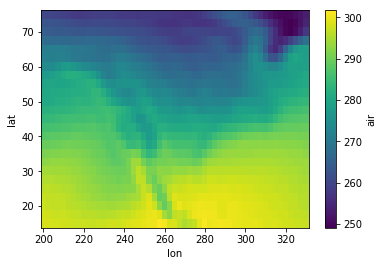

In [16]:
kelvin = ds.air.mean(dim='time')
kelvin.plot();

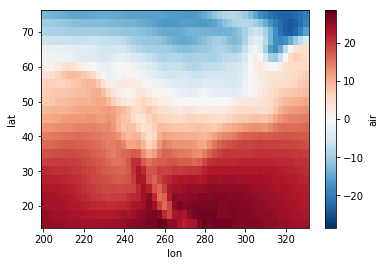

In [17]:
centigrade = kelvin - 273.16
centigrade.plot();

Notice xarray has changed the colormap according to the dataset (borrowing logic from Seaborn).
* With degrees C, the data passes through 0, so a diverging colormap is used
* With Kelvin, the default colormap is used.

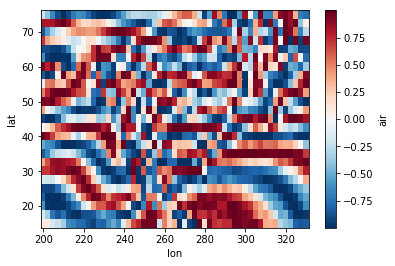

In [18]:
# ufuncs work too
np.sin(centigrade).plot();

## Adding Data to `DataSet`s

In [19]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

Let's add those kelvin and centigrade dataArrays to the dataset.

In [20]:
ds['centigrade'] = centigrade
ds['kelvin'] = kelvin
ds

<xarray.Dataset>
Dimensions:     (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 ...
  * lon         (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time        (time) datetime64[ns] 2013-01-01 ...
Data variables:
    air         (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
    centigrade  (lat, lon) float64 -12.78 -12.98 -13.27 -13.68 ...
    kelvin      (lat, lon) float64 260.4 260.2 259.9 259.5 259.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [21]:
ds.kelvin.attrs  # attrs are empty! Let's add some

OrderedDict()

In [22]:
ds.kelvin.attrs['Description'] = 'Mean air tempterature (through time) in kelvin.'

In [23]:
ds.kelvin

<xarray.DataArray 'kelvin' (lat: 25, lon: 53)>
array([[ 260.376442,  260.183051,  259.886627, ...,  250.815901,
         251.938116,  253.438048],
       [ 262.734394,  262.793976,  262.749339, ...,  249.755904,
         251.585757,  254.35926 ],
       [ 264.768764,  264.327308,  264.061695, ...,  250.60789 ,
         253.58351 ,  257.715599],
       ..., 
       [ 297.649863,  296.953332,  296.629315, ...,  296.810925,
         296.287962,  295.816455],
       [ 298.129202,  297.937007,  297.470394, ...,  296.859548,
         296.777027,  296.443836],
       [ 298.366151,  298.38574 ,  298.114144, ...,  297.338205,
         297.281445,  297.305103]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
Attributes:
    Description:  Mean air tempterature (through time) in kelvin.

In [24]:
ds.to_netcdf('new file.nc')

# 3. Selecting data with named dimensions

In xarray there are many different ways for selecting and indexing data.

### Positional indexing (old way)

This is the "old way", i.e. like ``numpy``:

In [25]:
ds.air[:, 1, 2]  # note that the attributes, coordinates are preserved

<xarray.DataArray 'air' (time: 2920)>
array([ 244.7 ,  244.2 ,  244.  , ...,  248.59,  248.49,  248.39])
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [ 185.16  322.1 ]
    tutorial-date:  27042017

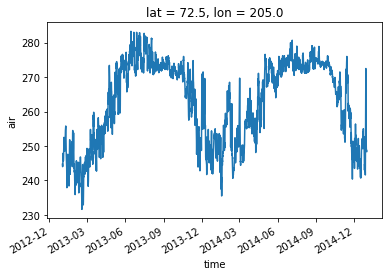

In [26]:
ds.air[:, 1, 2].plot();

This selection implies prior knowledge about the structure of the data, and is therefore much less readable than the "xarray methods" presented below.

### Selection by index

Selection based on the **index** of a coordinate:

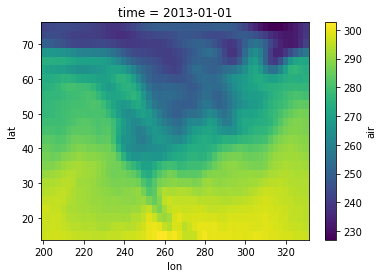

In [27]:
ds.air.isel(time=0).plot();  # like above, but with a dimension name this time

### Selection by value

Selection based on the **value** of a coordinate:

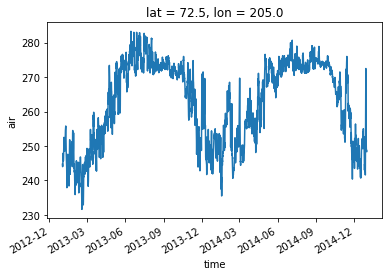

In [28]:
ds.air.sel(lat=72.5, lon=205).plot(); 

### Selection by value works well for time, too

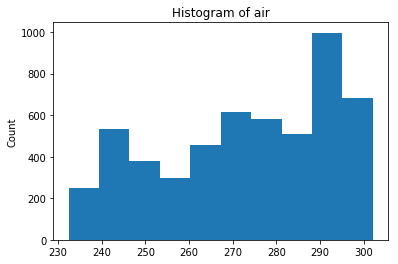

In [29]:
ds.air.sel(time='2013-01-02').plot(); # Note that we will extract 4 time steps! 3d data is plotted as histogram

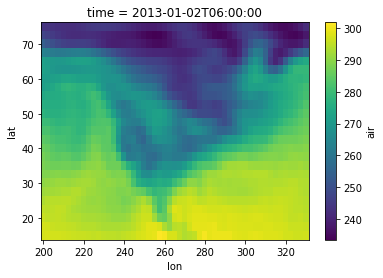

In [30]:
ds.air.sel(time='2013-01-02T06:00').plot();  # or look at a single timestep

### Selecting a range of values
The syntax is similar, but you'll need to use a [slice](https://docs.python.org/3/library/functions.html#slice):

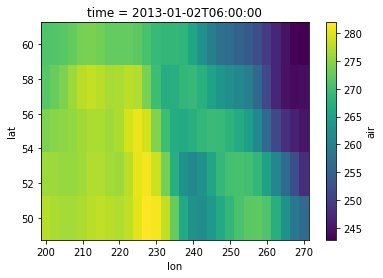

In [31]:
ds.air.sel(lat=slice(60, 50), lon=slice(200, 270), time='2013-01-02T06:00:00').plot();

### Nearest neighbor lookup

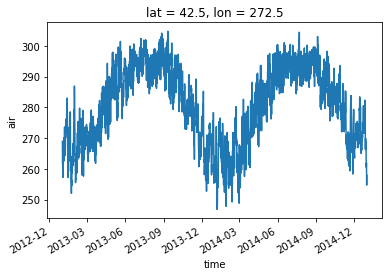

In [32]:
ds.air.sel(lat=41.8781, lon=360-87.6298, method='nearest', tolerance=5).plot();

# 4. Operations and computation

* We can do arithmetic directly on `Dataset` and `DataArray` objects. 
* Labels are preserved and dataArray dimensions automatically aligned.

### Broadcasting

<img src="./figures/broadcast.png" width="50%" align="left"> 

In [33]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

### Alignment

<img src="./figures/align.png" width="50%" align="left"> 

In [34]:
atime = np.arange(3)
btime = np.arange(5) + 1
atime, btime

(array([0, 1, 2]), array([1, 2, 3, 4, 5]))

In [35]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':atime})
b = xr.DataArray(np.arange(5), dims='time', 
                 coords={'time':btime})
a + b

<xarray.DataArray (time: 2)>
array([1, 3])
Coordinates:
  * time     (time) int64 1 2

### Aggregation


In [36]:
ds.max()

<xarray.Dataset>
Dimensions:     ()
Data variables:
    air         float64 317.4
    centigrade  float64 28.49
    kelvin      float64 301.6

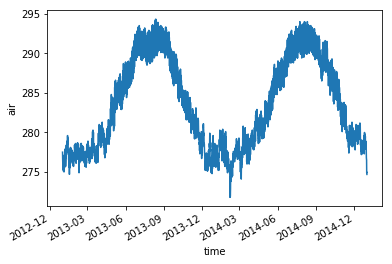

In [37]:
ds.air.median(dim=['lat', 'lon']).plot();

### Masking with `.where()`

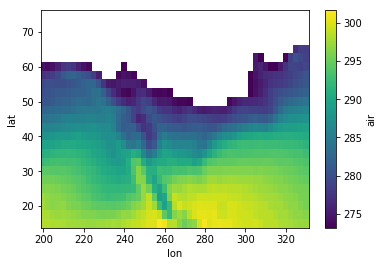

In [38]:
means = ds.air.mean(dim=['time'])
means.where(means > 273.15).plot();

# 5. Groupby and "split-apply-combine"

Xarray implements the "split-apply-combine" paradigm with `groupby`. This works really well for calculating climatologies:

In [39]:
ds.air.groupby('time.season').mean()

<xarray.DataArray 'air' (season: 4)>
array([ 273.649681,  289.204887,  278.991373,  283.028147])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

<img src="./figures/split_apply-combine.png" alt="split" style="width: 50%;"/>

In [40]:
ds.air.groupby('time.month').mean('time')

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[ 246.349758,  246.385927, ...,  244.087742,  245.646532],
        [ 248.8575  ,  248.907298, ...,  243.508468,  246.754516],
        ..., 
        [ 296.544677,  296.47    , ...,  295.081411,  294.530161],
        [ 297.154476,  297.238427, ...,  295.775806,  295.636774]],

       [[ 246.677098,  246.405625, ...,  243.001875,  244.443661],
        [ 247.799955,  247.759866, ...,  242.266116,  245.066429],
        ..., 
        [ 296.787768,  296.634687, ...,  294.21808 ,  293.702768],
        [ 297.289107,  297.216696, ...,  294.956027,  294.88    ]],

       ..., 
       [[ 253.744667,  253.644875, ...,  243.934417,  245.141958],
        [ 259.12975 ,  258.629208, ...,  243.079583,  245.466167],
        ..., 
        [ 298.587833,  298.420292, ...,  298.194   ,  297.908333],
        [ 298.811458,  298.856625, ...,  298.751875,  298.818958]],

       [[ 247.970887,  248.020968, ...,  241.023589,  242.628065],
        [ 249

In [41]:
clim = ds.air.groupby('time.month').mean('time')

You can also do arithmetic with groupby objects, which repeats the arithmetic over each group:

In [42]:
anomalies = ds.air.groupby('time.month') - clim

In [43]:
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ -5.149758,  -3.885927, ...,  -8.587742,  -7.046532],
        [ -5.0575  ,  -4.407298, ...,  -8.208468,  -7.454516],
        ..., 
        [ -0.644677,  -0.27    , ...,   0.818589,   0.669839],
        [ -0.864476,  -0.448427, ...,   1.014194,   0.963226]],

       [[ -4.249758,  -3.685927, ..., -10.487742,  -9.846532],
        [ -5.2575  ,  -4.807298, ..., -11.008468, -11.054516],
        ..., 
        [ -0.344677,   0.23    , ...,   0.418589,   0.569839],
        [ -0.864476,  -0.038427, ...,   0.624194,   0.963226]],

       ..., 
       [[ -2.180887,  -3.230968, ...,   2.966411,   2.161935],
        [  0.156613,  -0.870282, ...,   1.525484,   0.173992],
        ..., 
        [ -1.178185,  -0.190363, ...,  -1.756694,  -2.131411],
        [ -0.090927,   0.403226, ...,  -2.075403,  -2.347702]],

       [[ -2.880887,  -3.730968, ...,   0.466411,  -0.838065],
        [  0.156613,  -0.870282, ...,  -0.674516,  -2.426008],
 

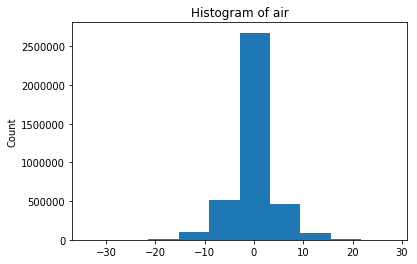

In [44]:
anomalies.plot();

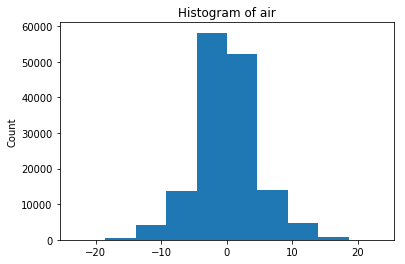

In [45]:
anomalies.sel(time= '2013-02').plot();  # Find all the anomolous values for February

Resample adjusts a time series to a new resolution:

In [46]:
tmin = ds.air.resample('1D', dim='time', how='min')  # Resample to one day '1D
tmax = ds.air.resample('1D', dim='time', how='max')

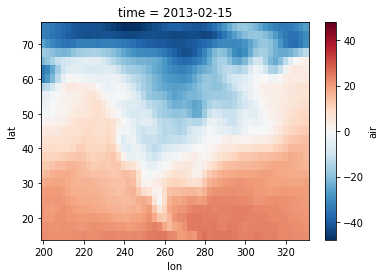

In [47]:
(tmin.sel(time='2013-02-15') - 273.15).plot();

In [48]:
ds_extremes = xr.Dataset({'tmin': tmin, 'tmax': tmax})

In [49]:
ds_extremes

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ...
Data variables:
    tmax     (time, lat, lon) float64 242.3 242.7 243.5 244.0 ...
    tmin     (time, lat, lon) float64 241.2 241.8 241.8 242.1 ...

# 6. Graphics 

``xarray`` plotting functions rely on matplotlib internally, but they make use of all available metadata to make the plotting operations more intuitive and interpretable.

### 1D plots

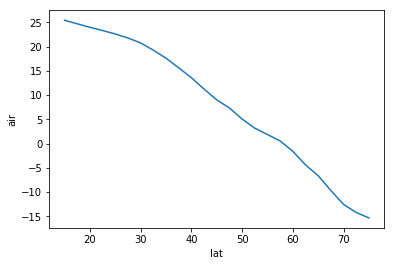

In [50]:
zonal_t_average = ds.air.mean(dim=['lon', 'time']) - 273.15
zonal_t_average.plot();  # 1D arrays are plotted as line plots

### 2D plots 

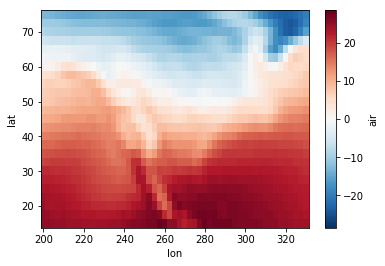

In [51]:
t_average = ds.air.mean(dim='time') - 273.15
t_average.plot();  # 2D arrays are plotted with pcolormesh

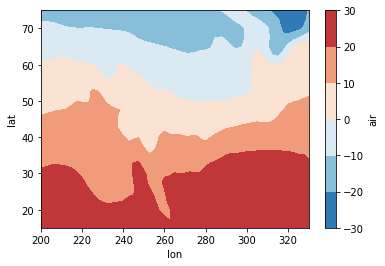

In [52]:
t_average.plot.contourf();  # but you can use contour(), contourf() or imshow() if you wish

### Customizing 2d plots

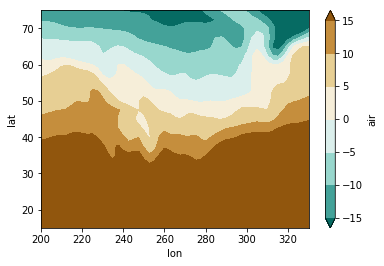

In [53]:
t_average.plot.contourf(cmap='BrBG_r', vmin=-15, vmax=15);

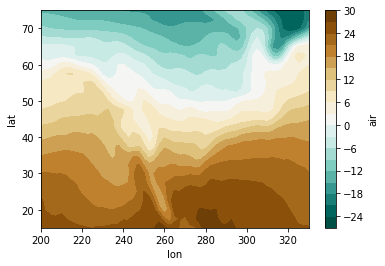

In [54]:
t_average.plot.contourf(cmap='BrBG_r', levels=22, center=False);

### Dealing with Outliers

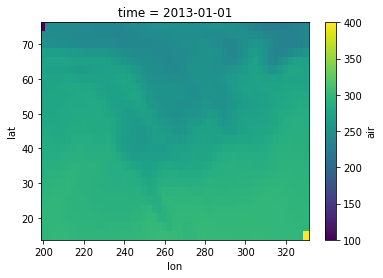

In [55]:
air_outliers = ds.air.isel(time=0).copy()
air_outliers[0, 0] = 100
air_outliers[-1, -1] = 400
air_outliers.plot();  # outliers mess with the datarange and colorscale!

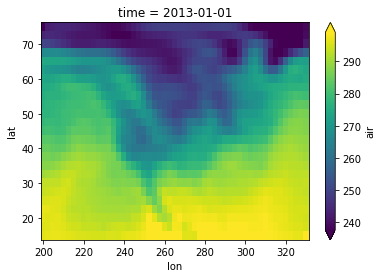

In [56]:
# Using `robust=True` uses the 2nd and 98th percentiles of the data to compute the color limits.
air_outliers.plot(robust=True);

### Facet plots 

In [57]:
t_season = ds.air.groupby('time.season').mean(dim='time') - 273.15

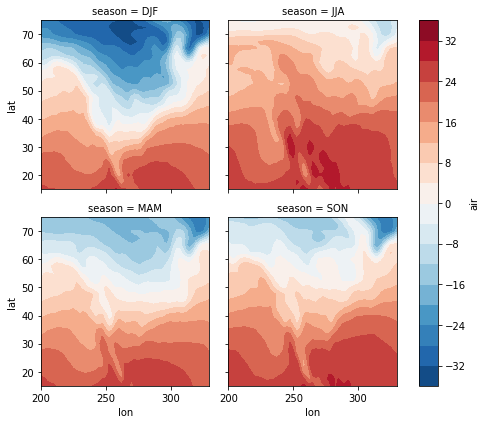

In [58]:
# facet plot allows to do multiplot with the same color mappings
t_season.plot.contourf(x='lon', y='lat', col='season', col_wrap=2, levels=22);

### Plotting on maps

For plotting on maps, we rely on the excellent [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) library.

In [59]:
import cartopy.crs as ccrs

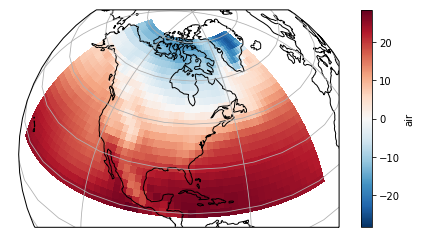

In [60]:
f = plt.figure(figsize=(8, 4))
# Define the map projection *on which* you want to plot
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
# ax is an empty plot. We now plot the variable t_average onto ax
# the keyword "transform" tells the function in which projection the air temp data is stored 
t_average.plot(ax=ax, transform=ccrs.PlateCarree())
# Add gridlines and coastlines to the plot
ax.coastlines(); ax.gridlines(); 

#### Facet plots on maps

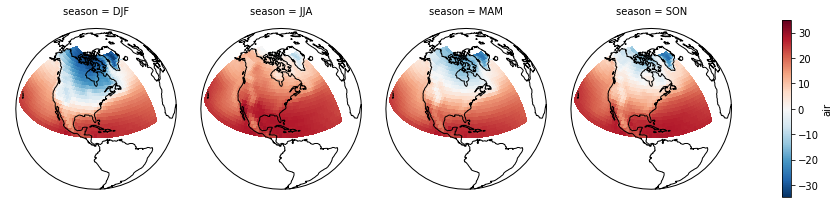

In [61]:
# this time we need to retrieve the plots to do things with the axes later on
p = t_season.plot(x='lon', y='lat', col='season', transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.Orthographic(-80, 35)})
for ax in p.axes.flat:
    ax.coastlines()

### Seaborn is Cool

Statistical visualization with [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/):

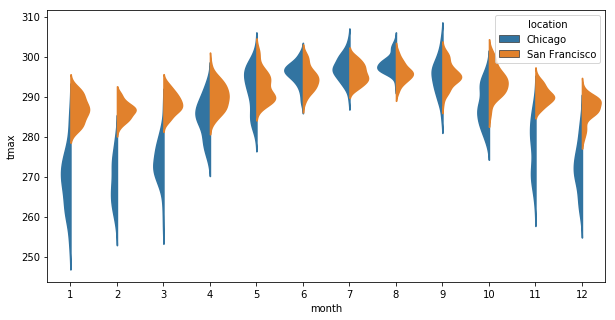

In [62]:
import seaborn as sns

data = (ds_extremes
        .sel_points(lat=[41.8781, 37.7749], lon=[360-87.6298, 360-122.4194],
                    method='nearest', tolerance=3,
                    dim=xr.DataArray(['Chicago', 'San Francisco'],
                                     name='location', dims='location'))
        .to_dataframe()
        .reset_index()
        .assign(month=lambda x: x.time.dt.month))

plt.figure(figsize=(10, 5))
sns.violinplot('month', 'tmax', 'location', data=data, split=True, inner=None);

# 7. Out-of-core computation

Here's a quick demo of [how xarray can leverage dask](http://xarray.pydata.org/en/stable/dask.html) to work with data that doesn't fit in memory. This lets xarray substitute for tools like `cdo` and `nco`.

### Let's open 10 years of runoff data

`xarray`can open multiple files at once using string pattern matching.  
  
  In this case we open all the files that match our `filestr`, i.e. all the files for the 2080s. 
  
  Each of these files (compressed) is approximately 80 MB.

In [63]:
from glob import glob
files = glob('data/*dis*.nc')
runoff = xr.open_mfdataset(files)

In [64]:
runoff

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 3653)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 ...
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * time     (time) datetime64[ns] 2081-01-01 2081-01-02 ...
Data variables:
    dis      (time, lat, lon) float64 nan nan nan nan nan nan nan ...
Attributes:
    CDI:          Climate Data Interface version 1.5.4 (http://code...
    Conventions:  CF-1.4
    history:      Sun Aug 26 16:33:59 2012: cdo -s setname,dis /scr...
    institution:  University of Utrecht, Dept. of Physical Geograph...
    title:        PCRGLOBWB output for ISI-MIP
    comment1:     pr_v3 tas_v2
    comment3:     Input data from HadGEM2-ES, rcp = rcp8p5 ,scen = ...
    comment2:     Model output from PCR-GLOBWB, version 2.0
    contact:      'd.wisser@uu.nl'
    CDO:          Climate Data Operators version 1.5.4 (http://code...

`xarray` even puts them in the right order for you.

In [65]:
runoff.time

<xarray.DataArray 'time' (time: 3653)>
array(['2081-01-01T00:00:00.000000000',
       '2081-01-02T00:00:00.000000000',
       '2081-01-03T00:00:00.000000000', ...,
       '2088-12-29T00:00:00.000000000',
       '2088-12-30T00:00:00.000000000',
       '2088-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2081-01-01 2081-01-02 ...
Attributes:
    standard_name:  time

How big is all this data uncompressed? Will it fit into memory?

In [66]:
runoff.nbytes / 1e9  # Convert to gigiabytes

7.574894344

## Working with Big Data

* This data is too big for our memory. 
* That means we need to process it in chunks. 
* We can do this chunking in `xarray` very easily.  
  
  `xarray` computes data 'lazily'. That means that data is only loaded into memory when it is actually required. This also allows us to inspect datasets without loading all the data into memory.  
  
  To do this `xarray` integrates with `dask` to support streaming computation on datasets that don’t fit into memory.

<img src="./figures/dask-array.png" width="40%" align="center"> 


In [67]:
runoff = runoff.chunk({'lat': 60})

In [68]:
runoff.chunks

Frozen(SortedKeysDict({u'lat': (60, 60, 60, 60, 60, 60), u'lon': (720,), u'time': (365, 366, 365, 365, 365, 365, 365, 365, 366, 366)}))

In [69]:
%time ro_seasonal = runoff.groupby('time.season').mean('time')

CPU times: user 57.6 ms, sys: 4.84 ms, total: 62.4 ms
Wall time: 62.4 ms


In [70]:
import dask
from multiprocessing.pool import ThreadPool
dask.set_options(pool=ThreadPool(1))

In [71]:
%time ro_seasonal.compute()

CPU times: user 38.5 s, sys: 8.47 s, total: 47 s
Wall time: 47.9 s


<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, season: 4)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 ...
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    dis      (season, lat, lon) float64 nan nan nan nan nan nan ...

In [72]:
dask.set_options(pool=ThreadPool(4))

In [73]:
%time ro_seasonal = runoff.groupby('time.season').mean('time')

CPU times: user 70.4 ms, sys: 3.55 ms, total: 74 ms
Wall time: 71 ms


In [74]:
%time result = ro_seasonal.compute()

CPU times: user 46.1 s, sys: 10.9 s, total: 57 s
Wall time: 43.5 s


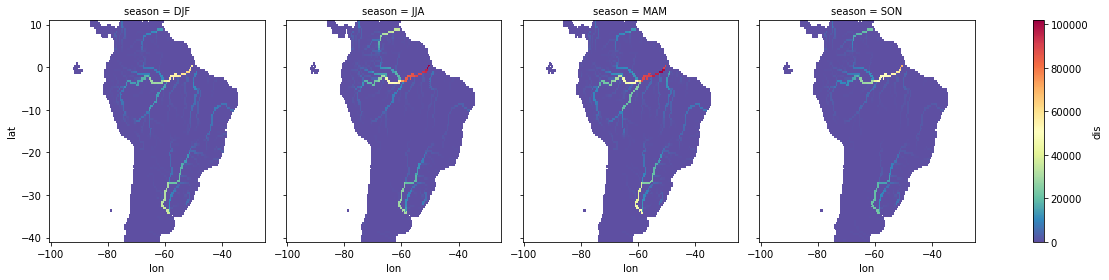

In [75]:
brazil = dict(lat=slice(10.75, -40.75), lon=slice(-100.25, -25.25))
result.dis.sel(**brazil).plot(col='season', size=4, cmap='Spectral_r')

# xarray can do more!

* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask
